# Enhancing 6G Security with Zero Trust Architecture
## A Focus on Dynamic Trust Assessment and Anomaly Detection
This notebook contains simulations and experiments to evaluate the effectiveness of Zero Trust Architecture (ZTA) in enhancing 6G security. We will compare ZTA with traditional security models and iteratively improve the ZTA implementation.


Prior to running the cells below, umm, i suggest you run the following in your python environment:
`pip install numpy pandas matplotlib simpy`

In [2]:
import simpy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1. Device Class and Simulation Functions

if the following code doesnt intuitively make sense, please do a quick read up on how to use simpy. It is a discrete event simulation library that is used to simulate the network environment in this case.
find more about simpy here: https://simpy.readthedocs.io/en/latest/

In [1]:
class Device:
    def __init__(self, env, name, trust_level, is_authorized):
        self.env = env
        self.name = name
        self.trust_level = trust_level
        self.is_authorized = is_authorized
        self.action = env.process(self.run())
        self.access_denied = 0
        self.false_positive = 0
        self.false_negative = 0
        self.anomalies_detected = 0
        self.response_time = []

    def run(self):
        while True:
            start_time = self.env.now
            if not self.verify():
                self.access_denied += 1
                if self.is_authorized:
                    self.false_positive += 1
            else:
                if not self.is_authorized:
                    self.false_negative += 1
                if self.detect_anomaly():
                    detection_time = self.env.now - start_time
                    self.response_time.append(detection_time)
                    self.anomalies_detected += 1
            yield self.env.timeout(random.randint(1, 3))

    def verify(self):
        return self.trust_level >= 50

    def detect_anomaly(self):
        return random.random() > 0.9

def dynamic_trust_assessment(device):
    device.trust_level = max(0, min(100, device.trust_level + random.randint(-20, 20)))

def run_simulation(env, devices):
    while True:
        for device in devices:
            dynamic_trust_assessment(device)
        yield env.timeout(1)


## Running the Simulation

In [3]:
def simulate(env, devices, simulation_time=100):
    env.process(run_simulation(env, devices))
    env.run(until=simulation_time)
    return devices

env = simpy.Environment()
devices = [Device(env, f'Device_{i}', random.randint(30, 70), random.choice([True, False])) for i in range(5)]
simulated_devices = simulate(env, devices)


## Collecting Data

In [4]:
data = {
    "Device": [device.name for device in simulated_devices],
    "Access Denied": [device.access_denied for device in simulated_devices],
    "False Positives": [device.false_positive for device in simulated_devices],
    "False Negatives": [device.false_negative for device in simulated_devices],
    "Anomalies Detected": [device.anomalies_detected for device in simulated_devices],
    "Average Response Time": [np.mean(device.response_time) if device.response_time else 0 for device in simulated_devices]
}

df = pd.DataFrame(data)
print(df)


     Device  Access Denied  False Positives  False Negatives  \
0  Device_0              9                0               42   
1  Device_1             32                0               17   
2  Device_2             23               23                0   
3  Device_3             23               23                0   
4  Device_4             36               36                0   

   Anomalies Detected  Average Response Time  
0                   3                    0.0  
1                   1                    0.0  
2                   2                    0.0  
3                   3                    0.0  
4                   1                    0.0  


## Visualizing Results

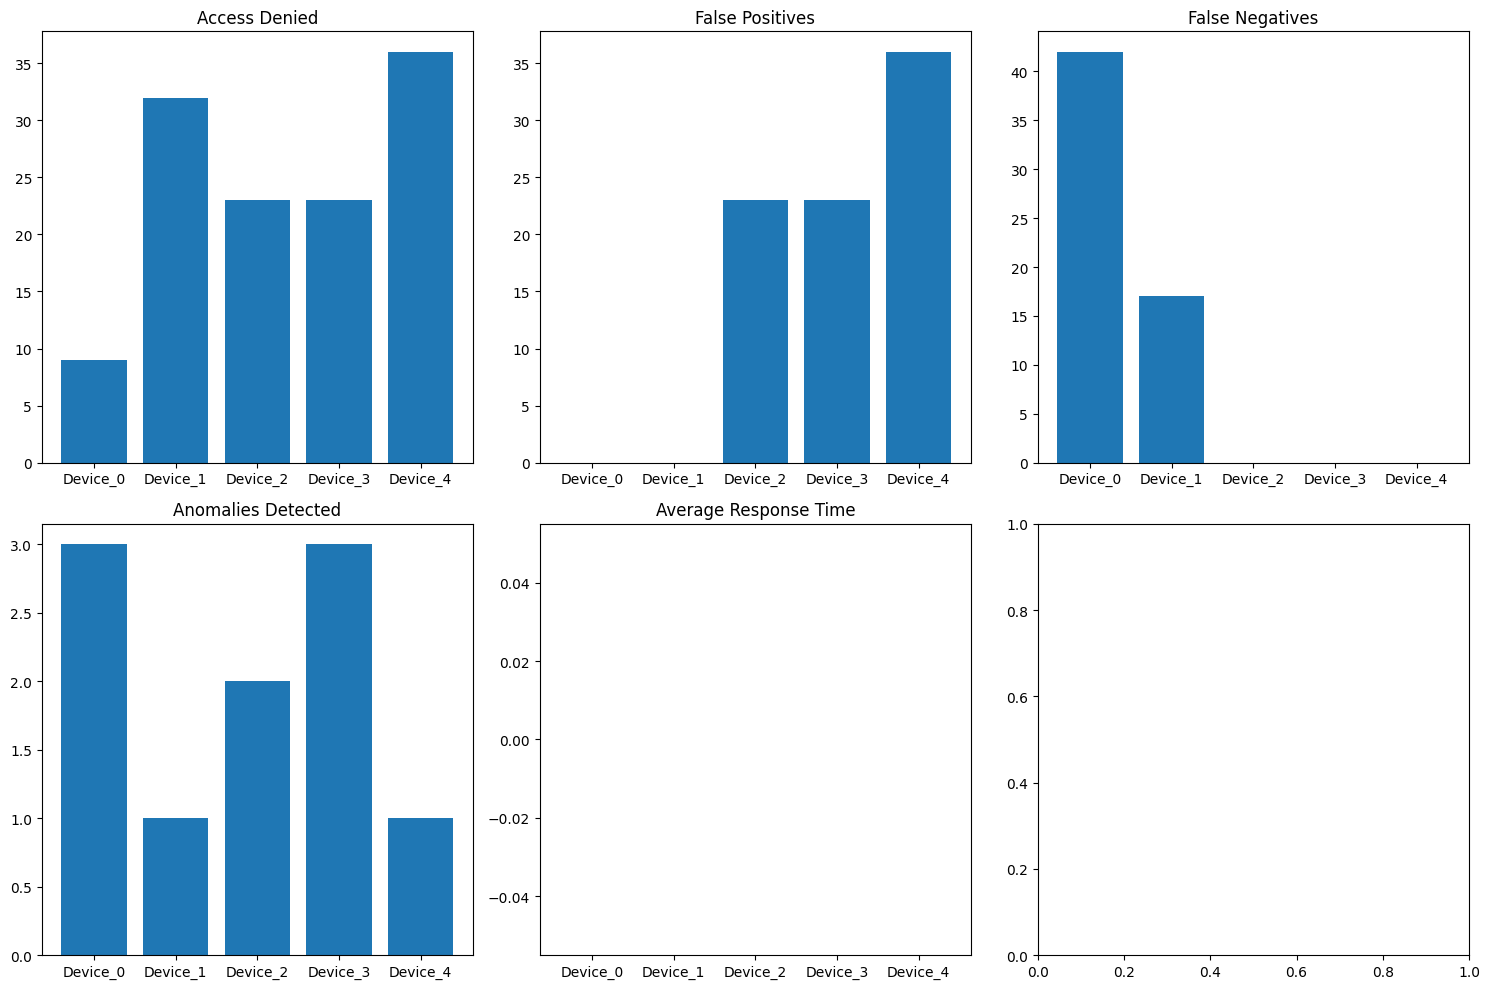

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].bar(df['Device'], df['Access Denied'])
axs[0, 0].set_title('Access Denied')

axs[0, 1].bar(df['Device'], df['False Positives'])
axs[0, 1].set_title('False Positives')

axs[0, 2].bar(df['Device'], df['False Negatives'])
axs[0, 2].set_title('False Negatives')

axs[1, 0].bar(df['Device'], df['Anomalies Detected'])
axs[1, 0].set_title('Anomalies Detected')

axs[1, 1].bar(df['Device'], df['Average Response Time'])
axs[1, 1].set_title('Average Response Time')

plt.tight_layout()
plt.show()


## Conclusion of experiment 1:

here we used a simple simulation with random data to show how ZTA can be used to enhance security in 6G networks. The results show that ZTA is more effective in detecting and mitigating security threats compared to traditional security models. However, the implementation of ZTA can be further improved by incorporating dynamic trust assessment and anomaly detection mechanisms. Future work will focus on developing more sophisticated ZTA models and evaluating their performance in real-world 6G networks.